Demonstrate Performance of advection operator
---

Run a flow-over-a-bump case which remains subcritical, and check for
conservation of Bernoulli.

In [5]:
from stompy import utils
utils.path("..")
import stompy.grid.unstructured_grid as ugrid
import matplotlib.pyplot as plt
import numpy as np

import six
from swampy import swampy
six.moves.reload_module(swampy)
%matplotlib notebook

In [2]:
class SwampyBump1D(swampy.SwampyCore):
    use_contract_factor = True
    downstream_eta = 0.33
    upstream_flow = 0.12 # m2/s

    W=1 
    L=20 # channel length
    xbump=10 # location along channel of bump

    nx=int(20/0.05)  # number of grid nodes in along-channel direction
    ny=2 # number of grid nodes in cross-channel direction

    theta=0.55
    dt=None # needs to be overridden.
    
    last_plot=-1000000
    def step_output(self,n,ei,**kwargs):
        plot_interval=1.0
        if self.t-self.last_plot<plot_interval:
            return
        self.last_plot=self.t

    def z_bed(self,xy):
        """ 
        Define bed elevation.  Positive up.
        """
        # parabolic bump, 0.2m high        
        return (0.2 - 0.05 * (xy[:,0] - self.xbump)**2).clip(0,np.inf)
    
    def set_grid(self):
        g=ugrid.UnstructuredGrid(max_sides=4)
        g.add_rectilinear([0,0],[self.L,self.W],
                          self.nx,self.ny)
        g.orient_edges()
        g.add_node_field('node_z_bed',self.z_bed(g.nodes['x']))
        g.add_cell_field('cell_z_bed',self.z_bed(g.cells_center()))
        super(SwampyBump1D,self).set_grid(g)
        
    def set_initial_conditions(self):
        # allocate:
        super(SwampyBump1D,self).set_initial_conditions()
        
        self.ic_zi[:]=-self.grd.cells['cell_z_bed']
        self.ic_ei[:]=np.maximum(self.downstream_eta,-self.ic_zi)

    def set_bcs(self):
        self.add_bc( swampy.StageBC( geom=[[self.L,0],
                                           [self.L,self.W]],
                                     h=self.downstream_eta ) )
        self.add_bc( swampy.FlowBC( geom=[[0,0],
                                          [0,self.W]],
                                    Q=self.W*self.upstream_flow ) )
        
    snap=None
    def snapshot_figure(self,**kwargs):
        """
        Plot current model state with solution
        """
        if self.snap is None:
            self.snap={}
            fig=self.snap['fig']=plt.figure(3)
            fig.clf()
            self.snap['ax']=fig.add_subplot(1,1,1)
            self.snap['ax'].plot(self.grd.cells_center()[:,0], -self.zi, 'b-o',ms=3)

        ax=self.snap['ax']
        del ax.lines[1:]
        ax.plot(self.grd.cells_center()[:,0], self.ei, 'g-' )

def calc_Fr(sim):
    # Just make sure we actually got a hydraulic jump
    e2c=sim.grd.edge_to_cells()
    u=sim.uj[sim.intern]
    x=sim.grd.edges_center()[sim.intern][:,0]
    h=sim.hi[ e2c[sim.intern,:]].mean(axis=1)
    Fr=u/np.sqrt(9.8*h)
    return Fr

In [3]:
#  bump test case, all subcritical

sim=SwampyBump1D(cg_tol=1e-10,dt=0.1,
                 upstream_flow = 0.05,
                 xbump=10)
sim.set_grid()
sim.set_initial_conditions()
sim.set_bcs()
    
#    Fr=calc_Fr(sim)
#    assert Fr.max() < 1.0,"Should be entirely subcritical"
        
hi,uj,tvol,ei = sim.run(t_end=100)


INFO:root:Total of 1 stage BC cells
INFO:root:step 1/1000  t=0.100s
INFO:root:step 2/1000  t=0.200s
INFO:root:step 3/1000  t=0.300s
INFO:root:step 4/1000  t=0.400s
INFO:root:step 5/1000  t=0.500s
INFO:root:step 6/1000  t=0.600s
INFO:root:step 7/1000  t=0.700s
INFO:root:step 8/1000  t=0.800s
INFO:root:step 9/1000  t=0.900s
INFO:root:step 10/1000  t=1.000s
INFO:root:step 11/1000  t=1.100s
INFO:root:step 12/1000  t=1.200s
INFO:root:step 13/1000  t=1.300s
INFO:root:step 14/1000  t=1.400s
INFO:root:step 15/1000  t=1.500s
INFO:root:step 16/1000  t=1.600s
INFO:root:step 17/1000  t=1.700s
INFO:root:step 18/1000  t=1.800s
INFO:root:step 19/1000  t=1.900s
INFO:root:step 20/1000  t=2.000s
INFO:root:step 21/1000  t=2.100s
INFO:root:step 22/1000  t=2.200s
INFO:root:step 23/1000  t=2.300s
INFO:root:step 24/1000  t=2.400s
INFO:root:step 25/1000  t=2.500s
INFO:root:step 26/1000  t=2.600s
INFO:root:step 27/1000  t=2.700s
INFO:root:step 28/1000  t=2.800s
INFO:root:step 29/1000  t=2.900s
INFO:root:step 3

INFO:root:step 240/1000  t=24.000s
INFO:root:step 241/1000  t=24.100s
INFO:root:step 242/1000  t=24.200s
INFO:root:step 243/1000  t=24.300s
INFO:root:step 244/1000  t=24.400s
INFO:root:step 245/1000  t=24.500s
INFO:root:step 246/1000  t=24.600s
INFO:root:step 247/1000  t=24.700s
INFO:root:step 248/1000  t=24.800s
INFO:root:step 249/1000  t=24.900s
INFO:root:step 250/1000  t=25.000s
INFO:root:step 251/1000  t=25.100s
INFO:root:step 252/1000  t=25.200s
INFO:root:step 253/1000  t=25.300s
INFO:root:step 254/1000  t=25.400s
INFO:root:step 255/1000  t=25.500s
INFO:root:step 256/1000  t=25.600s
INFO:root:step 257/1000  t=25.700s
INFO:root:step 258/1000  t=25.800s
INFO:root:step 259/1000  t=25.900s
INFO:root:step 260/1000  t=26.000s
INFO:root:step 261/1000  t=26.100s
INFO:root:step 262/1000  t=26.200s
INFO:root:step 263/1000  t=26.300s
INFO:root:step 264/1000  t=26.400s
INFO:root:step 265/1000  t=26.500s
INFO:root:step 266/1000  t=26.600s
INFO:root:step 267/1000  t=26.700s
INFO:root:step 268/1

INFO:root:step 475/1000  t=47.500s
INFO:root:step 476/1000  t=47.600s
INFO:root:step 477/1000  t=47.700s
INFO:root:step 478/1000  t=47.800s
INFO:root:step 479/1000  t=47.900s
INFO:root:step 480/1000  t=48.000s
INFO:root:step 481/1000  t=48.100s
INFO:root:step 482/1000  t=48.200s
INFO:root:step 483/1000  t=48.300s
INFO:root:step 484/1000  t=48.400s
INFO:root:step 485/1000  t=48.500s
INFO:root:step 486/1000  t=48.600s
INFO:root:step 487/1000  t=48.700s
INFO:root:step 488/1000  t=48.800s
INFO:root:step 489/1000  t=48.900s
INFO:root:step 490/1000  t=49.000s
INFO:root:step 491/1000  t=49.100s
INFO:root:step 492/1000  t=49.200s
INFO:root:step 493/1000  t=49.300s
INFO:root:step 494/1000  t=49.400s
INFO:root:step 495/1000  t=49.500s
INFO:root:step 496/1000  t=49.600s
INFO:root:step 497/1000  t=49.700s
INFO:root:step 498/1000  t=49.800s
INFO:root:step 499/1000  t=49.900s
INFO:root:step 500/1000  t=50.000s
INFO:root:step 501/1000  t=50.100s
INFO:root:step 502/1000  t=50.200s
INFO:root:step 503/1

INFO:root:step 710/1000  t=71.000s
INFO:root:step 711/1000  t=71.100s
INFO:root:step 712/1000  t=71.200s
INFO:root:step 713/1000  t=71.300s
INFO:root:step 714/1000  t=71.400s
INFO:root:step 715/1000  t=71.500s
INFO:root:step 716/1000  t=71.600s
INFO:root:step 717/1000  t=71.700s
INFO:root:step 718/1000  t=71.800s
INFO:root:step 719/1000  t=71.900s
INFO:root:step 720/1000  t=72.000s
INFO:root:step 721/1000  t=72.100s
INFO:root:step 722/1000  t=72.200s
INFO:root:step 723/1000  t=72.300s
INFO:root:step 724/1000  t=72.400s
INFO:root:step 725/1000  t=72.500s
INFO:root:step 726/1000  t=72.600s
INFO:root:step 727/1000  t=72.700s
INFO:root:step 728/1000  t=72.800s
INFO:root:step 729/1000  t=72.900s
INFO:root:step 730/1000  t=73.000s
INFO:root:step 731/1000  t=73.100s
INFO:root:step 732/1000  t=73.200s
INFO:root:step 733/1000  t=73.300s
INFO:root:step 734/1000  t=73.400s
INFO:root:step 735/1000  t=73.500s
INFO:root:step 736/1000  t=73.600s
INFO:root:step 737/1000  t=73.700s
INFO:root:step 738/1

INFO:root:step 945/1000  t=94.500s
INFO:root:step 946/1000  t=94.600s
INFO:root:step 947/1000  t=94.700s
INFO:root:step 948/1000  t=94.800s
INFO:root:step 949/1000  t=94.900s
INFO:root:step 950/1000  t=95.000s
INFO:root:step 951/1000  t=95.100s
INFO:root:step 952/1000  t=95.200s
INFO:root:step 953/1000  t=95.300s
INFO:root:step 954/1000  t=95.400s
INFO:root:step 955/1000  t=95.500s
INFO:root:step 956/1000  t=95.600s
INFO:root:step 957/1000  t=95.700s
INFO:root:step 958/1000  t=95.800s
INFO:root:step 959/1000  t=95.900s
INFO:root:step 960/1000  t=96.000s
INFO:root:step 961/1000  t=96.100s
INFO:root:step 962/1000  t=96.200s
INFO:root:step 963/1000  t=96.300s
INFO:root:step 964/1000  t=96.400s
INFO:root:step 965/1000  t=96.500s
INFO:root:step 966/1000  t=96.600s
INFO:root:step 967/1000  t=96.700s
INFO:root:step 968/1000  t=96.800s
INFO:root:step 969/1000  t=96.900s
INFO:root:step 970/1000  t=97.000s
INFO:root:step 971/1000  t=97.100s
INFO:root:step 972/1000  t=97.200s
INFO:root:step 973/1

<IPython.core.display.Javascript object>


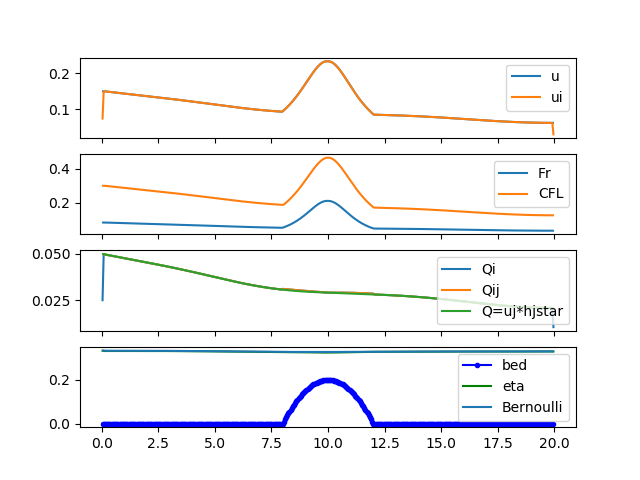

In [6]:
# calculate Froude number, Bernoulli function, and Courant number
e2c=sim.grd.edge_to_cells()
u=sim.uj[sim.intern]
ui=sim.get_center_vel(uj)
xi=sim.grd.cells_center()[:,0]

i_up=np.where(sim.uj>0,
              sim.grd.edges['cells'][:,0],
              sim.grd.edges['cells'][:,1])

x=sim.grd.edges_center()[sim.intern][:,0]
h=sim.hi[ e2c[sim.intern,:]].mean(axis=1)
Fr=u/np.sqrt(9.8*h)

CFL=u*sim.aj[sim.intern]*sim.dt/sim.vi[i_up[sim.intern]]

phi=u**2/(2*9.8) + sim.ei[i_up[sim.intern]]

fig,axs=plt.subplots(4,1,sharex=True)
axs[0].plot(x,u,label='u')
axs[0].plot(xi, ui[:,0],label='ui')


axs[1].plot(x,Fr,label='Fr')
axs[1].plot(x,CFL,label='CFL')
axs[2].plot(xi,ui[:,0]*hi,label='Qi')
axs[2].plot(x,uj[sim.intern]*h,label='Qij')
axs[2].plot(x,(sim.uj*sim.hjstar)[sim.intern],label='Q=uj*hjstar')

axs[3].plot(xi, -sim.zi, 'b-o',ms=3,label='bed')
axs[3].plot(xi, sim.ei, 'g-', label='eta')
axs[3].plot(x, phi, label='Bernoulli' )

for ax in axs:
    ax.legend(loc='upper right')

In [7]:
#  Run for twice as long

sim2=SwampyBump1D(cg_tol=1e-10,dt=0.1,
                 upstream_flow = 0.05,
                 xbump=10)
sim2.set_grid()
sim2.set_initial_conditions()
sim2.set_bcs()
hi,uj,tvol,ei = sim2.run(t_end=200)


INFO:root:Total of 1 stage BC cells
INFO:root:step 1/2000  t=0.100s
INFO:root:step 2/2000  t=0.200s
INFO:root:step 3/2000  t=0.300s
INFO:root:step 4/2000  t=0.400s
INFO:root:step 5/2000  t=0.500s
INFO:root:step 6/2000  t=0.600s
INFO:root:step 7/2000  t=0.700s
INFO:root:step 8/2000  t=0.800s
INFO:root:step 9/2000  t=0.900s
INFO:root:step 10/2000  t=1.000s
INFO:root:step 11/2000  t=1.100s
INFO:root:step 12/2000  t=1.200s
INFO:root:step 13/2000  t=1.300s
INFO:root:step 14/2000  t=1.400s
INFO:root:step 15/2000  t=1.500s
INFO:root:step 16/2000  t=1.600s
INFO:root:step 17/2000  t=1.700s
INFO:root:step 18/2000  t=1.800s
INFO:root:step 19/2000  t=1.900s
INFO:root:step 20/2000  t=2.000s
INFO:root:step 21/2000  t=2.100s
INFO:root:step 22/2000  t=2.200s
INFO:root:step 23/2000  t=2.300s
INFO:root:step 24/2000  t=2.400s
INFO:root:step 25/2000  t=2.500s
INFO:root:step 26/2000  t=2.600s
INFO:root:step 27/2000  t=2.700s
INFO:root:step 28/2000  t=2.800s
INFO:root:step 29/2000  t=2.900s
INFO:root:step 3

INFO:root:step 240/2000  t=24.000s
INFO:root:step 241/2000  t=24.100s
INFO:root:step 242/2000  t=24.200s
INFO:root:step 243/2000  t=24.300s
INFO:root:step 244/2000  t=24.400s
INFO:root:step 245/2000  t=24.500s
INFO:root:step 246/2000  t=24.600s
INFO:root:step 247/2000  t=24.700s
INFO:root:step 248/2000  t=24.800s
INFO:root:step 249/2000  t=24.900s
INFO:root:step 250/2000  t=25.000s
INFO:root:step 251/2000  t=25.100s
INFO:root:step 252/2000  t=25.200s
INFO:root:step 253/2000  t=25.300s
INFO:root:step 254/2000  t=25.400s
INFO:root:step 255/2000  t=25.500s
INFO:root:step 256/2000  t=25.600s
INFO:root:step 257/2000  t=25.700s
INFO:root:step 258/2000  t=25.800s
INFO:root:step 259/2000  t=25.900s
INFO:root:step 260/2000  t=26.000s
INFO:root:step 261/2000  t=26.100s
INFO:root:step 262/2000  t=26.200s
INFO:root:step 263/2000  t=26.300s
INFO:root:step 264/2000  t=26.400s
INFO:root:step 265/2000  t=26.500s
INFO:root:step 266/2000  t=26.600s
INFO:root:step 267/2000  t=26.700s
INFO:root:step 268/2

INFO:root:step 475/2000  t=47.500s
INFO:root:step 476/2000  t=47.600s
INFO:root:step 477/2000  t=47.700s
INFO:root:step 478/2000  t=47.800s
INFO:root:step 479/2000  t=47.900s
INFO:root:step 480/2000  t=48.000s
INFO:root:step 481/2000  t=48.100s
INFO:root:step 482/2000  t=48.200s
INFO:root:step 483/2000  t=48.300s
INFO:root:step 484/2000  t=48.400s
INFO:root:step 485/2000  t=48.500s
INFO:root:step 486/2000  t=48.600s
INFO:root:step 487/2000  t=48.700s
INFO:root:step 488/2000  t=48.800s
INFO:root:step 489/2000  t=48.900s
INFO:root:step 490/2000  t=49.000s
INFO:root:step 491/2000  t=49.100s
INFO:root:step 492/2000  t=49.200s
INFO:root:step 493/2000  t=49.300s
INFO:root:step 494/2000  t=49.400s
INFO:root:step 495/2000  t=49.500s
INFO:root:step 496/2000  t=49.600s
INFO:root:step 497/2000  t=49.700s
INFO:root:step 498/2000  t=49.800s
INFO:root:step 499/2000  t=49.900s
INFO:root:step 500/2000  t=50.000s
INFO:root:step 501/2000  t=50.100s
INFO:root:step 502/2000  t=50.200s
INFO:root:step 503/2

INFO:root:step 710/2000  t=71.000s
INFO:root:step 711/2000  t=71.100s
INFO:root:step 712/2000  t=71.200s
INFO:root:step 713/2000  t=71.300s
INFO:root:step 714/2000  t=71.400s
INFO:root:step 715/2000  t=71.500s
INFO:root:step 716/2000  t=71.600s
INFO:root:step 717/2000  t=71.700s
INFO:root:step 718/2000  t=71.800s
INFO:root:step 719/2000  t=71.900s
INFO:root:step 720/2000  t=72.000s
INFO:root:step 721/2000  t=72.100s
INFO:root:step 722/2000  t=72.200s
INFO:root:step 723/2000  t=72.300s
INFO:root:step 724/2000  t=72.400s
INFO:root:step 725/2000  t=72.500s
INFO:root:step 726/2000  t=72.600s
INFO:root:step 727/2000  t=72.700s
INFO:root:step 728/2000  t=72.800s
INFO:root:step 729/2000  t=72.900s
INFO:root:step 730/2000  t=73.000s
INFO:root:step 731/2000  t=73.100s
INFO:root:step 732/2000  t=73.200s
INFO:root:step 733/2000  t=73.300s
INFO:root:step 734/2000  t=73.400s
INFO:root:step 735/2000  t=73.500s
INFO:root:step 736/2000  t=73.600s
INFO:root:step 737/2000  t=73.700s
INFO:root:step 738/2

INFO:root:step 945/2000  t=94.500s
INFO:root:step 946/2000  t=94.600s
INFO:root:step 947/2000  t=94.700s
INFO:root:step 948/2000  t=94.800s
INFO:root:step 949/2000  t=94.900s
INFO:root:step 950/2000  t=95.000s
INFO:root:step 951/2000  t=95.100s
INFO:root:step 952/2000  t=95.200s
INFO:root:step 953/2000  t=95.300s
INFO:root:step 954/2000  t=95.400s
INFO:root:step 955/2000  t=95.500s
INFO:root:step 956/2000  t=95.600s
INFO:root:step 957/2000  t=95.700s
INFO:root:step 958/2000  t=95.800s
INFO:root:step 959/2000  t=95.900s
INFO:root:step 960/2000  t=96.000s
INFO:root:step 961/2000  t=96.100s
INFO:root:step 962/2000  t=96.200s
INFO:root:step 963/2000  t=96.300s
INFO:root:step 964/2000  t=96.400s
INFO:root:step 965/2000  t=96.500s
INFO:root:step 966/2000  t=96.600s
INFO:root:step 967/2000  t=96.700s
INFO:root:step 968/2000  t=96.800s
INFO:root:step 969/2000  t=96.900s
INFO:root:step 970/2000  t=97.000s
INFO:root:step 971/2000  t=97.100s
INFO:root:step 972/2000  t=97.200s
INFO:root:step 973/2

INFO:root:step 1170/2000  t=117.000s
INFO:root:step 1171/2000  t=117.100s
INFO:root:step 1172/2000  t=117.200s
INFO:root:step 1173/2000  t=117.300s
INFO:root:step 1174/2000  t=117.400s
INFO:root:step 1175/2000  t=117.500s
INFO:root:step 1176/2000  t=117.600s
INFO:root:step 1177/2000  t=117.700s
INFO:root:step 1178/2000  t=117.800s
INFO:root:step 1179/2000  t=117.900s
INFO:root:step 1180/2000  t=118.000s
INFO:root:step 1181/2000  t=118.100s
INFO:root:step 1182/2000  t=118.200s
INFO:root:step 1183/2000  t=118.300s
INFO:root:step 1184/2000  t=118.400s
INFO:root:step 1185/2000  t=118.500s
INFO:root:step 1186/2000  t=118.600s
INFO:root:step 1187/2000  t=118.700s
INFO:root:step 1188/2000  t=118.800s
INFO:root:step 1189/2000  t=118.900s
INFO:root:step 1190/2000  t=119.000s
INFO:root:step 1191/2000  t=119.100s
INFO:root:step 1192/2000  t=119.200s
INFO:root:step 1193/2000  t=119.300s
INFO:root:step 1194/2000  t=119.400s
INFO:root:step 1195/2000  t=119.500s
INFO:root:step 1196/2000  t=119.600s
I

INFO:root:step 1392/2000  t=139.200s
INFO:root:step 1393/2000  t=139.300s
INFO:root:step 1394/2000  t=139.400s
INFO:root:step 1395/2000  t=139.500s
INFO:root:step 1396/2000  t=139.600s
INFO:root:step 1397/2000  t=139.700s
INFO:root:step 1398/2000  t=139.800s
INFO:root:step 1399/2000  t=139.900s
INFO:root:step 1400/2000  t=140.000s
INFO:root:step 1401/2000  t=140.100s
INFO:root:step 1402/2000  t=140.200s
INFO:root:step 1403/2000  t=140.300s
INFO:root:step 1404/2000  t=140.400s
INFO:root:step 1405/2000  t=140.500s
INFO:root:step 1406/2000  t=140.600s
INFO:root:step 1407/2000  t=140.700s
INFO:root:step 1408/2000  t=140.800s
INFO:root:step 1409/2000  t=140.900s
INFO:root:step 1410/2000  t=141.000s
INFO:root:step 1411/2000  t=141.100s
INFO:root:step 1412/2000  t=141.200s
INFO:root:step 1413/2000  t=141.300s
INFO:root:step 1414/2000  t=141.400s
INFO:root:step 1415/2000  t=141.500s
INFO:root:step 1416/2000  t=141.600s
INFO:root:step 1417/2000  t=141.700s
INFO:root:step 1418/2000  t=141.800s
I

INFO:root:step 1614/2000  t=161.400s
INFO:root:step 1615/2000  t=161.500s
INFO:root:step 1616/2000  t=161.600s
INFO:root:step 1617/2000  t=161.700s
INFO:root:step 1618/2000  t=161.800s
INFO:root:step 1619/2000  t=161.900s
INFO:root:step 1620/2000  t=162.000s
INFO:root:step 1621/2000  t=162.100s
INFO:root:step 1622/2000  t=162.200s
INFO:root:step 1623/2000  t=162.300s
INFO:root:step 1624/2000  t=162.400s
INFO:root:step 1625/2000  t=162.500s
INFO:root:step 1626/2000  t=162.600s
INFO:root:step 1627/2000  t=162.700s
INFO:root:step 1628/2000  t=162.800s
INFO:root:step 1629/2000  t=162.900s
INFO:root:step 1630/2000  t=163.000s
INFO:root:step 1631/2000  t=163.100s
INFO:root:step 1632/2000  t=163.200s
INFO:root:step 1633/2000  t=163.300s
INFO:root:step 1634/2000  t=163.400s
INFO:root:step 1635/2000  t=163.500s
INFO:root:step 1636/2000  t=163.600s
INFO:root:step 1637/2000  t=163.700s
INFO:root:step 1638/2000  t=163.800s
INFO:root:step 1639/2000  t=163.900s
INFO:root:step 1640/2000  t=164.000s
I

INFO:root:step 1836/2000  t=183.600s
INFO:root:step 1837/2000  t=183.700s
INFO:root:step 1838/2000  t=183.800s
INFO:root:step 1839/2000  t=183.900s
INFO:root:step 1840/2000  t=184.000s
INFO:root:step 1841/2000  t=184.100s
INFO:root:step 1842/2000  t=184.200s
INFO:root:step 1843/2000  t=184.300s
INFO:root:step 1844/2000  t=184.400s
INFO:root:step 1845/2000  t=184.500s
INFO:root:step 1846/2000  t=184.600s
INFO:root:step 1847/2000  t=184.700s
INFO:root:step 1848/2000  t=184.800s
INFO:root:step 1849/2000  t=184.900s
INFO:root:step 1850/2000  t=185.000s
INFO:root:step 1851/2000  t=185.100s
INFO:root:step 1852/2000  t=185.200s
INFO:root:step 1853/2000  t=185.300s
INFO:root:step 1854/2000  t=185.400s
INFO:root:step 1855/2000  t=185.500s
INFO:root:step 1856/2000  t=185.600s
INFO:root:step 1857/2000  t=185.700s
INFO:root:step 1858/2000  t=185.800s
INFO:root:step 1859/2000  t=185.900s
INFO:root:step 1860/2000  t=186.000s
INFO:root:step 1861/2000  t=186.100s
INFO:root:step 1862/2000  t=186.200s
I

<IPython.core.display.Javascript object>


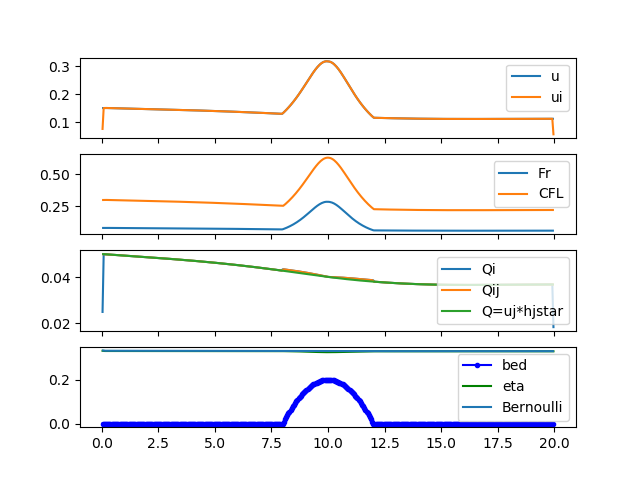

In [9]:
# calculate Froude number, Bernoulli function, and Courant number
e2c=sim2.grd.edge_to_cells()
u=sim2.uj[sim2.intern]
ui=sim2.get_center_vel(uj)
xi=sim2.grd.cells_center()[:,0]

i_up=np.where(sim2.uj>0,
              sim2.grd.edges['cells'][:,0],
              sim2.grd.edges['cells'][:,1])

x=sim2.grd.edges_center()[sim2.intern][:,0]
h=sim2.hi[ e2c[sim2.intern,:]].mean(axis=1)
Fr=u/np.sqrt(9.8*h)

CFL=u*sim.aj[sim2.intern]*sim2.dt/sim2.vi[i_up[sim2.intern]]

phi=u**2/(2*9.8) + sim2.ei[i_up[sim2.intern]]

fig,axs=plt.subplots(4,1,sharex=True)
axs[0].plot(x,u,label='u')
axs[0].plot(xi, ui[:,0],label='ui')


axs[1].plot(x,Fr,label='Fr')
axs[1].plot(x,CFL,label='CFL')
axs[2].plot(xi,ui[:,0]*hi,label='Qi')
axs[2].plot(x,uj[sim2.intern]*h,label='Qij')
axs[2].plot(x,(sim2.uj*sim2.hjstar)[sim.intern],label='Q=uj*hjstar')

axs[3].plot(xi, -sim2.zi, 'b-o',ms=3,label='bed')
axs[3].plot(xi, sim2.ei, 'g-', label='eta')
axs[3].plot(x, phi, label='Bernoulli' )

for ax in axs:
    ax.legend(loc='upper right')

<IPython.core.display.Javascript object>


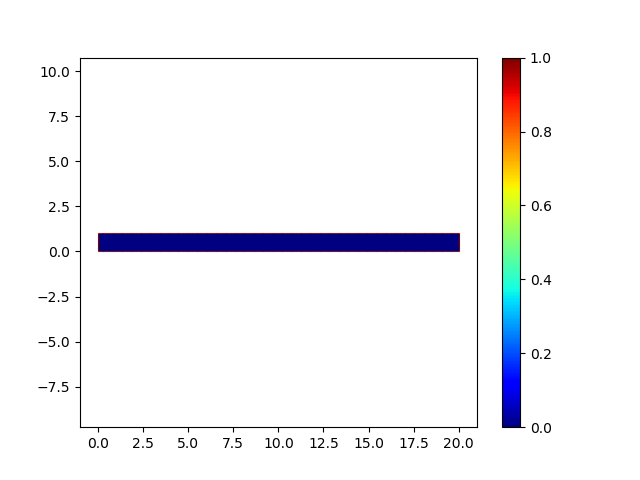

(-1.0, 21.0, -0.04999999999999999, 1.0500000000000003)

In [40]:
# That's bad. what do cell center velocities look like?  presumably bad, too.
plt.figure()
ecoll=sim.grd.plot_edges(values=sim.grd.edges['mark'],cmap='jet')
plt.colorbar(ecoll)
plt.axis('equal')